Henry Zou

In [ ]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> quit
Command 'quit' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> Quit
Command 'Quit' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages = [line.rstrip () for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
# show message that identified as spam or ham
for mess_no, messages in enumerate(messages[:10]):
    print(mess_no, messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h3> EDA, data visualization </h3>

In [11]:
messages.describe()

# since count != unique, we know that there are some repeat messages, like hey, yes, no

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
messages['length'] = messages['message'].apply(len)

In [14]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


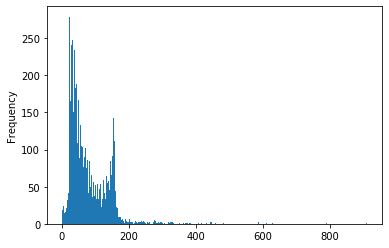

In [16]:
messages['length'].plot.hist(bins = 350)

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length'] == 910]['message'].iloc[0] # explore outliers

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa625aa4850>,
      dtype=object)

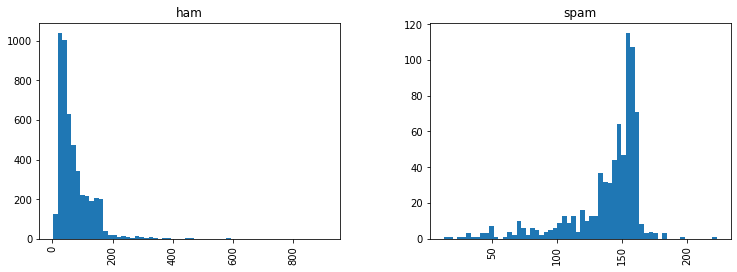

In [19]:
messages.hist(column = 'length', by = 'label', bins = 60, figsize = (12, 4))

In [20]:
# Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters. (Sorry Romeo!)

# Now let's begin to process the data so we can eventually use it with SciKit Learn!

In [21]:
import string

In [22]:
mess = 'Sample message! Notice: It has puncuations.'

In [23]:
nopunc = [c for c in mess if c not in string.punctuation]

In [24]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [25]:
from nltk.corpus import stopwords

In [26]:
nopunc = ''.join(nopunc)

In [27]:
nopunc.split()

['Sample', 'message', 'Notice', 'It', 'has', 'puncuations']

In [28]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [29]:
clean_mess

['Sample', 'message', 'Notice', 'puncuations']

In [30]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]





In [31]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
# bag of words transformer
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [34]:
print(len(bow_transformer.vocabulary_))

11425


In [35]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [36]:
bow4 = bow_transformer.transform([mess4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [37]:
bow_transformer.get_feature_names()[4068]

'U'

In [38]:
messages_bow = bow_transformer.transform(messages['message'])

In [39]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [41]:
print("Amount of Non-Zero ocurrences ", messages_bow.nnz)

Amount of Non-Zero ocurrences  50548


In [42]:
# the numbers of non-zero messages vs the total numbers of messages
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsity : {}'.format(round(sparsity)))

Sparsity : 0


In [43]:
# term frequence invest document
from sklearn.feature_extraction.text import TfidfTransformer

In [44]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [46]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [47]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['University']]

8.93254160700959

In [51]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])


In [54]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [55]:
messages['label'][3]

'ham'

In [56]:
all_pred = spam_detect_model.predict(messages_ftidf)

In [57]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [59]:
from sklearn.model_selection import train_test_split

In [63]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], 
                                                                messages['label'], test_size = 0.3)

In [64]:
msg_train

5475    Dhoni have luck to win some big title.so we wi...
2875    Crucify is c not s. You should have told me ea...
3213                    We got a divorce. Lol. She.s here
4260    Sad story of a Man - Last week was my b'day. M...
2507                                 Who u talking about?
                              ...                        
2166                        I'm not coming home 4 dinner.
5347    No sir. That's why i had an 8-hr trip on the b...
5129    Rose for red,red for blood,blood for heart,hea...
3494                      Cool, text me when you head out
4741    I keep seeing weird shit and bein all "woah" t...
Name: message, Length: 3900, dtype: object

In [66]:
from sklearn.pipeline import Pipeline

In [68]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB())
])

In [69]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fa625f78ef0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [73]:
predictions = pipeline.predict(msg_test)

In [74]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1436
        spam       1.00      0.70      0.83       236

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672

